<div class="usecase-title">Business establishments  (land use) and jobs</div>

<div class="usecase-authors"><b>Authored by: Harsh Dwivedi</b> </div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python & Matlplotlib & Machine Learning Basics</div>
</div>

<header>
<h2>Scenario</h2>
<div>As an urban planner or policymaker in Melbourne,
I want to analyze the relationship between business establishments, land use, and employment patterns within CLUE locations,
So that I can gain insights into potential business locations, attract potential employees, optimize resource allocation, and foster economic growth within the city. </div>

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- {list the skills demonstrated in your use caseUnderstand how to analyze spatial and employment data.* 
Identify correlations between business establishments and employment patterns.* 
Gain insights into optimal business locations * .
Learn how to use data to inform urban development strategie* s.
Develop skills in data visualization and interpretation.}

## Introduction

In the bustling city of Melbourne, urban planners and policymakers are tasked with the challenge of understanding the intricate dynamics between business establishments, land use, and employment patterns. The City of Melbourne’s Census of Land Use and Employment (CLUE) dataset provides a wealth of information that can be leveraged to gain insights into these relationships.

The objective of this analysis is to examine business establishments within CLUE locations and explore land usage across various sectors of employment. By doing so, business owners and stakeholders can identify potential business locations, attract employees in specific job sectors, and optimize resource allocation. This, in turn, contributes to economic growth and the creation of vibrant, sustainable communities within Melbourne.### CLUE DATASETsets
Spatial Layer Dataset: This dataset maps CLUE datasets to CLUE blocks, providing geographical boundaries that can be linked to CLUE information. It includes data on establishments, employment, and floor space from 2002 

### Employment Dataset
 This dataset covers employment data from 2002 to 2022, showing the number of jobs per CLUE block, classified by industry and small area allocation. It has been confidentialized to protect commercially sensitive information. Sample Data:Data:

## Importing all the desired Dependencies .

In [9]:

import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import folium
import seaborn as sns
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import folium
import os
import json
import io
# Data import
import requests

# Data manipulation
import pandas as pd

## Calling the dataset and APi

In [11]:
# **Preferred Method**: Export Endpoint
import requests
import pandas as pd
from io import StringIO

#Function to collect data
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = api_key #use if use datasets API_key permissions
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        #'api_key': apikey  #use if use datasets API_key permissions
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f'Request failed with status code {response.status_code}')

In [12]:
# Set dataset_id to query for the API call dataset name
dataset_id_1 = 'blocks-for-census-of-land-use-and-employment-clue'
# Save dataset to df varaible
df = collect_data(dataset_id_1)
# Check number of records in df
print(f'The dataset contains {len(df)} records.')
# View df
df.head(3)

The dataset contains 606 records.


,geo_point_2d,geo_shape,block_id,clue_area
0,"-37.82296169692379, 144.95049282288122","{""coordinates"": [[[144.9479230372, -37.8233694...",1112,Docklands
1,"-37.78537422996195, 144.94085920366408","{""coordinates"": [[[144.9426153438, -37.7866287...",927,Parkville
2,"-37.777687358375964, 144.94600024715058","{""coordinates"": [[[144.9425926939, -37.7787229...",929,Parkville


In [13]:
dataset_id_2 = 'employment-by-block-by-clue-industry'
df2 = collect_data(dataset_id_2)
print(f'The second dataset contains {len(df2)} records.')
print(df2.head(3))

The second dataset contains 12394 records.
   census_year  block_id  clue_small_area  accommodation  \
0         2022         4  Melbourne (CBD)            0.0   
1         2022         5  Melbourne (CBD)            0.0   
2         2022         6  Melbourne (CBD)            0.0   

   admin_and_support_services  agriculture_and_mining  \
0                         0.0                     0.0   
1                         0.0                     0.0   
2                         0.0                     0.0   

   arts_and_recreation_services  business_services  construction  \
0                         362.0                0.0           0.0   
1                           0.0                0.0           0.0   
2                         203.0                0.0           0.0   

   education_and_training  ...  information_media_and_telecommunications  \
0                     NaN  ...                                       0.0   
1                     0.0  ...                                

In [14]:
dataset_id_3 = 'floor-space-by-use-by-block'
df3 = collect_data(dataset_id_3)
print(f'The second dataset contains {len(df3)} records.')
print(df3.head(3))

The second dataset contains 12394 records.
   census_year  block_id  clue_small_area  commercial_accommodation  \
0         2013      2387  North Melbourne                       0.0   
1         2013      2390  North Melbourne                       0.0   
2         2013      2501       Kensington                       0.0   

   common_area  community_use  educational_research  \
0          NaN            0.0                   NaN   
1       1040.0            0.0                   NaN   
2          0.0            NaN                   0.0   

   entertainment_recreation_indoor  equipment_installation  hospital_clinic  \
0                              NaN                     0.0              0.0   
1                              0.0                     0.0              0.0   
2                              0.0                     0.0              0.0   

   ...  transport  transport_storage_uncovered  unoccupied_under_construction  \
0  ...        0.0                          0.0       

##  Cleaning the data

Part## 1: Data Preprocessing
Data preprocessing involves cleaning and preparing the data for analysis. This includes handling missing values, converting data types, and merging datasets.

In [30]:
# Print detailed information about the DataFrame
spatial_df = collect_data(dataset_id_1)
employment_df = collect_data(dataset_id_2)


print(spatial_df.info())
print(employment_df.info())
print("Columns in the first dataset (Spatial Layer):")
print(df.columns)

print("\nColumns in the second dataset (Employment):")
print(df2.columns)

print("\nColumns in the third dataset (Floor Space):")
print(df3.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   geo_point_2d  606 non-null    object
 1   geo_shape     606 non-null    object
 2   block_id      606 non-null    int64 
 3   clue_area     606 non-null    object
dtypes: int64(1), object(3)
memory usage: 19.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12394 entries, 0 to 12393
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   census_year                               12394 non-null  int64  
 1   block_id                                  12394 non-null  int64  
 2   clue_small_area                           12394 non-null  object 
 3   accommodation                             9986 non-null   float64
 4   admin_and_support_services                10375 

In [36]:

# Clean spatial layer dataset
df['coordinates'] = df['geo_shape'].apply(lambda x: json.loads(x)['coordinates'])

# Clean employment dataset
df2.fillna(0, inplace=True)

# Clean floor space dataset
df3.fillna(0, inplace=True)

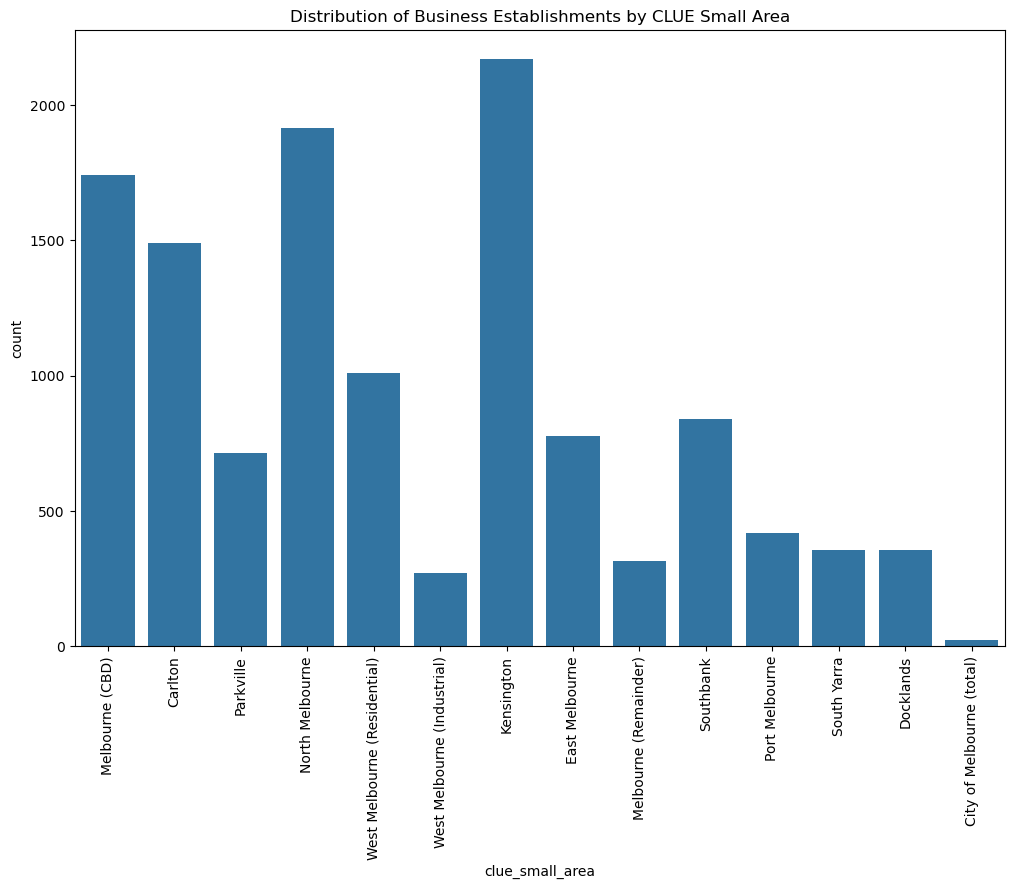

In [40]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df2, x='clue_small_area')
plt.title('Distribution of Business Establishments by CLUE Small Area')
plt.xticks(rotation=90)
plt.show()


## Employment Patterns Over Time

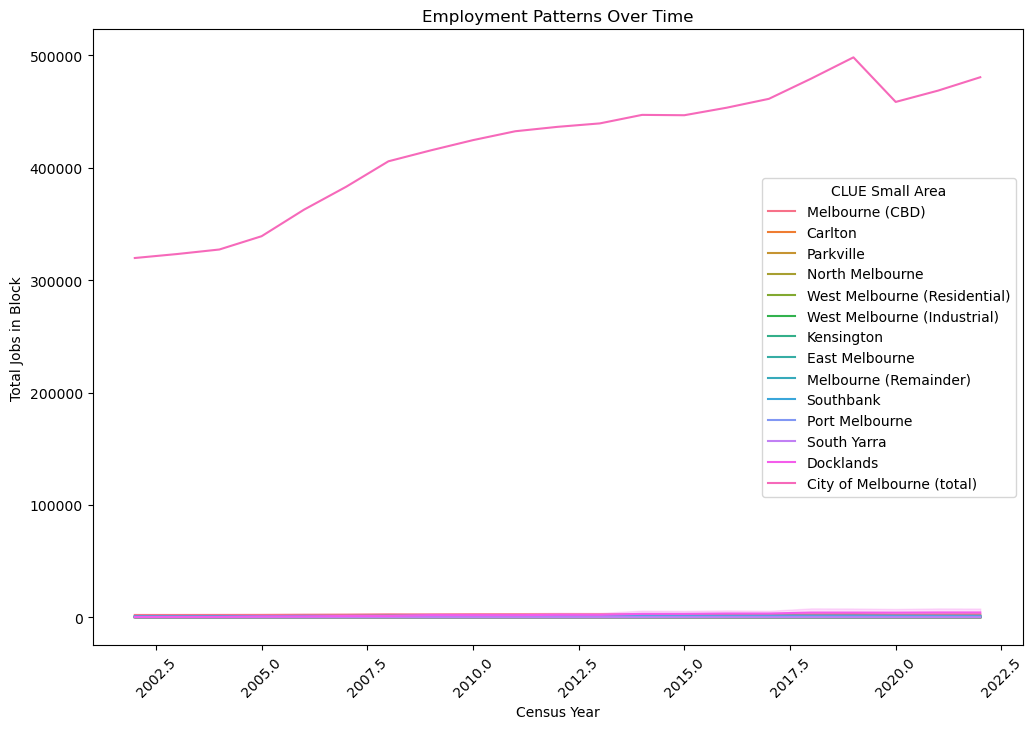

In [52]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df2, x='census_year', y='total_jobs_in_block', hue='clue_small_area')
plt.title('Employment Patterns Over Time')
plt.xticks(rotation=45)
plt.xlabel('Census Year')
plt.ylabel('Total Jobs in Block')
plt.legend(title='CLUE Small Area')
plt.show()



In [ ]:
##

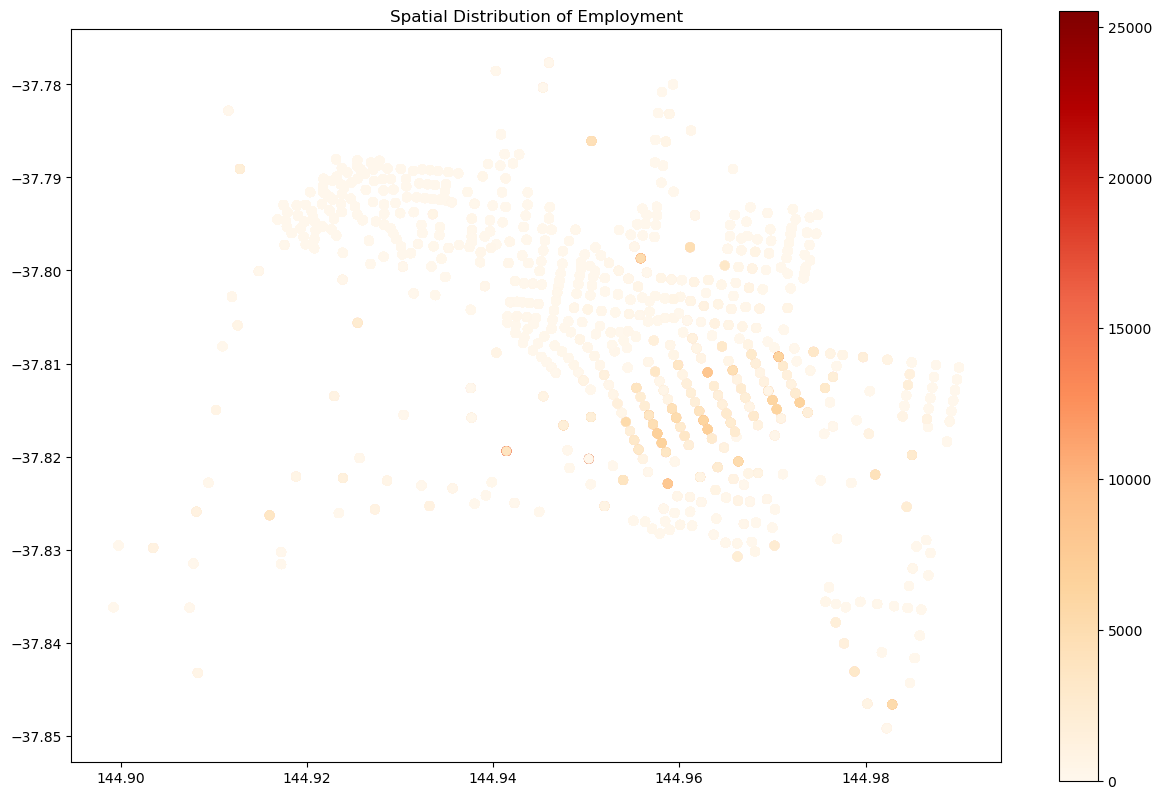

In [54]:
# Ensure the 'geo_point_2d' column is split correctly
df[['latitude', 'longitude']] = df['geo_point_2d'].str.split(',', expand=True)
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Merge spatial layer with employment data
merged_data = df.merge(df2, left_on='block_id', right_on='block_id')

# Convert merged_data to a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_data, geometry=gpd.points_from_xy(merged_data['longitude'], merged_data['latitude']))

# Plot the spatial distribution of employment
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(column='total_jobs_in_block', ax=ax, legend=True, cmap='OrRd')
plt.title('Spatial Distribution of Employment')
plt.show()


## Part 2: Feature Engineering
Feature engineering involves creating new features from the existing data to help in the analysis. This can include calculating new metrics, aggregating data, and creating spatial features.

## Part 3: Visualization Using Folium

In [ ]:
# Ensure only numerical columns are included for correlation
import matplotlib.pyplot as plt

numerical_features = ['accommodation', 'admin_and_support_services', 'agriculture_and_mining',
                      'arts_and_recreation_services', 'business_services', 'construction',
                      'education_and_training', 'electricity_gas_water_and_waste_services',
                      'finance_and_insurance', 'food_and_beverage_services',
                      'health_care_and_social_assistance', 'information_media_and_telecommunications',
                      'manufacturing', 'other_services', 'public_administration_and_safety',
                      'real_estate_services', 'rental_and_hiring_services', 'retail_trade',
                      'transport_postal_and_storage', 'wholesale_trade', 'total_jobs_in_block']

# Create a correlation matrix
corr_matrix = employment_df[numerical_features].corr()
import seaborn as sns

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Employment Features')
plt.show()



In [ ]:
# data s

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load and preproces

# Clean the spatial layer dataset
spatial_df[['latitude', 'longitude']] = spatial_df['Geo Point'].str.split(',', expand=True)
spatial_df['latitude'] = spatial_df['latitude'].astype(float)
spatial_df['longitude'] = spatial_df['longitude'].astype(float)
spatial_df['geometry'] = spatial_df['Geo Shape'].apply(lambda x: Polygon(eval(x)['coordinates'][0]))
spatial_gdf = gpd.GeoDataFrame(spatial_df, geometry='geometry')

# Clean the employment dataset
employment_df.fillna(0, inplace=True)
employment_df['Census year'] = employment_df['Census year'].astype(int)
employment_df['Block ID'] = employment_df['Block ID'].astype(int)
employment_df['Total jobs in block'] = employment_df['Total jobs in block'].astype(int)

# Merge the datasets on Block ID
merged_df = pd.merge(spatial_gdf, employment_df, left_on='block_id', right_on='Block ID')

# Feature Engineering
merged_df['area'] = merged_df['geometry'].area
merged_df['job_density'] = merged_df['Total jobs in block'] / merged_df['area']

# Prepare the data for modeling
features = merged_df[['latitude', 'longitude', 'area', 'job_density']]
target = merged_df['Total jobs in block']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


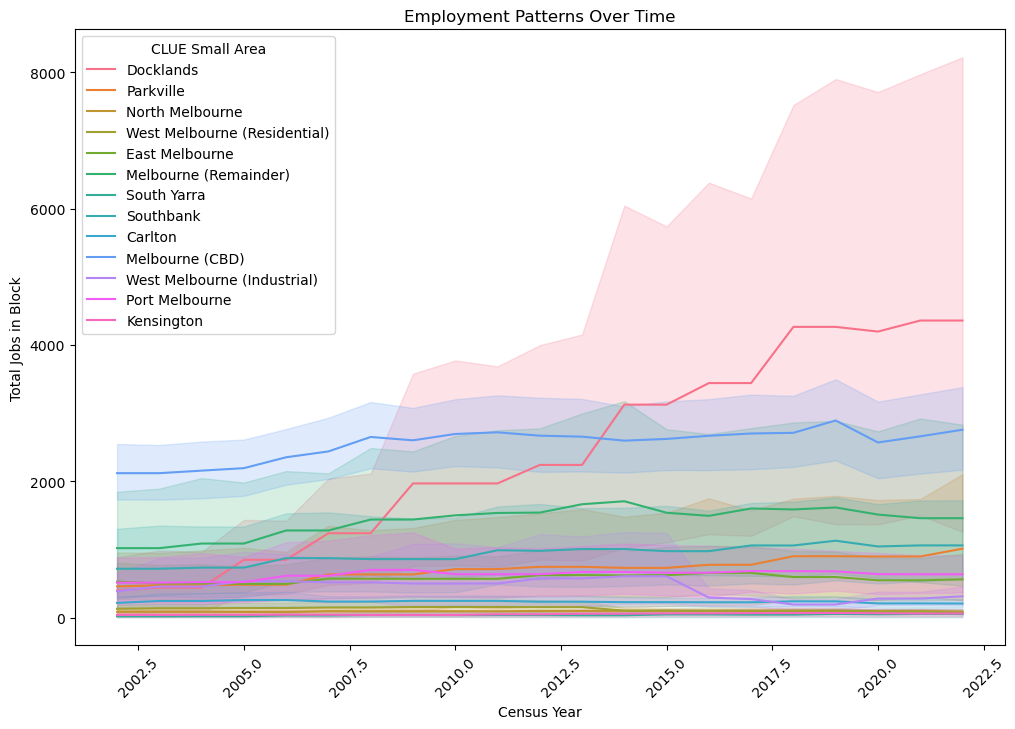

In [72]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=merged_data, x='census_year', y='total_jobs_in_block', hue='clue_small_area')
plt.title('Employment Patterns Over Time')
plt.xticks(rotation=45)
plt.xlabel('Census Year')
plt.ylabel('Total Jobs in Block')
plt.legend(title='CLUE Small Area')
plt.show()


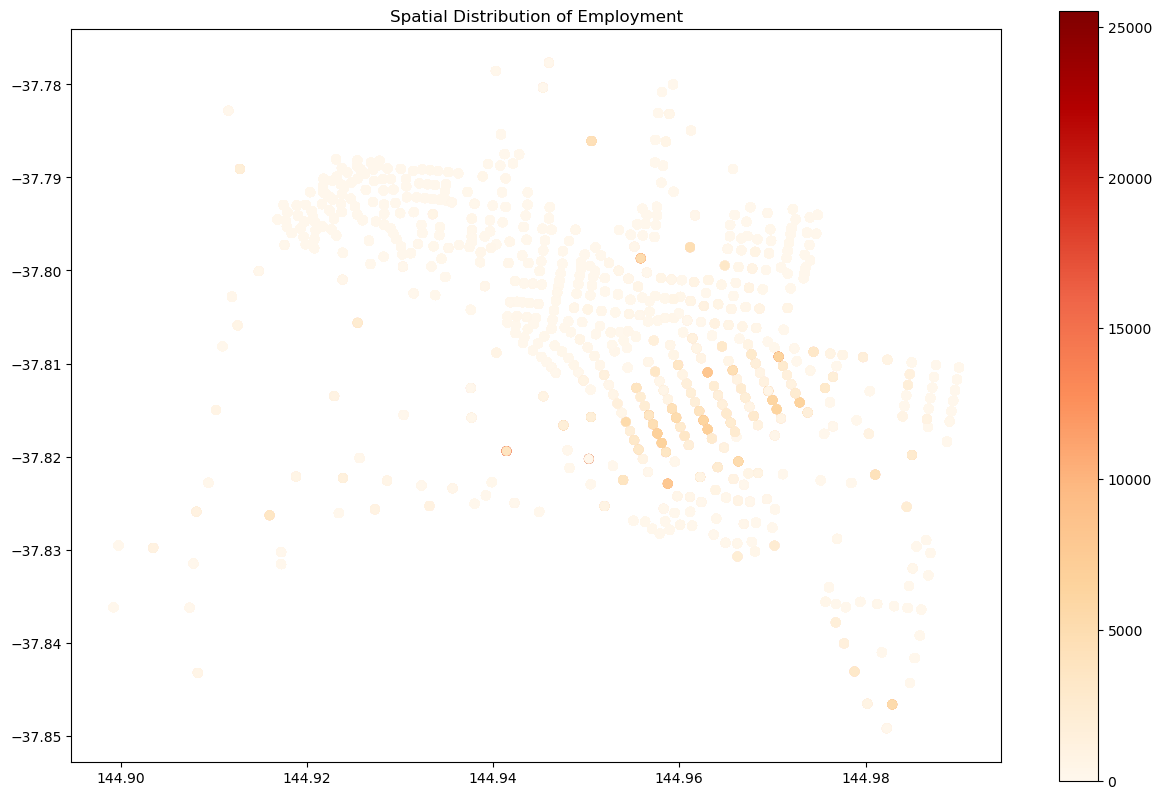

In [74]:
# Convert merged_data to a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_data, geometry=gpd.points_from_xy(merged_data['longitude'], merged_data['latitude']))

# Plot the spatial distribution of employment
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(column='total_jobs_in_block', ax=ax, legend=True, cmap='OrRd')
plt.title('Spatial Distribution of Employment')
plt.show()
